# Housing Prices in King County, WA: Random Forest Analysis
Goal
- Analyze Random Forest predictors in relation to predictor and response variables

## Obtain Data

In [1]:
# global imports

# matplotlib features
import matplotlib.pyplot as plt

# numpy features
import numpy as np

# scipy features
from scipy.stats import gaussian_kde

In [2]:
# import stored values 
%store -r dfs
%store -r final_model
%store -r rf_test_data

# assign dataframes to variables
X_train = dfs[0]
y_train = dfs[3] 

# check importing data frames worked
df = [X_train, y_train]
for d in df:
    print(d.shape)

(3181, 18)
(3181, 1)


## Examine Feature Importance
### Important Features
- 'sqftAbove'
    - Data visualizations depict a positive, linear relationship between 'price' and 'sqftAbove'
        - Typically, increases in above ground living space correlate with increases in price
        - See "Scatterplot of Sale Price vs Above Ground Living Space" in the *WashingtonHouseSales-DataVisualization* notebook
- 'bathroom'
    - Data visualizations depicting the relationship between'price' and 'bathroom' show sale prices varies greatly depending on the number of bathrooms in a home
        - Houses with more bathrooms tend to be sold for higher prices
        - See "Boxplot of Sale Price Grouped by Number of Bathrooms" in the *WashingtonHouseSales-DataVisualization* notebook 

### Unimportant Features
- 'location' (Vashon Island, North, East Rural, South Rural)
    - Data visualizations depicting the relationship between 'location' and 'price' show are sold for similar prices in Vashon Island, North, East Rural, and South Rural
        - See "Boxplot of Sale Price Grouped by Location" in the *WashingtonHouseSales-DataVisualization* notebook
        
### Removing Features
- I did not choose to remove unimportant features and refit the model
    - The current model is not overfitted to the data
    - Removing features may make the current model less reliable

In [3]:
# fit the model
final_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [4]:
# lists
names = X_train.columns
importance = final_model.feature_importances_
importance_list = []
# list of feature and its importance
for ind, col in enumerate(names):
    current = [col, importance[ind]]
    importance_list.append(current)

# order by list by feature importance
sorted(importance_list, key = lambda x: x[1])

[['location_Vashon Island', 0.0003944837158454553],
 ['location_North', 0.0031575829873600274],
 ['location_East Rural', 0.00316906032390839],
 ['location_South Rural', 0.0055540060207169535],
 ['waterfront', 0.010312667838339848],
 ['location_Seattle', 0.019514434448441375],
 ['condition', 0.020448628775485523],
 ['floors', 0.02750041247757563],
 ['bedroom', 0.037546285529450746],
 ['location_East Urban', 0.042265343372457416],
 ['yrWorked', 0.050766306622298335],
 ['location_South Urban', 0.06199266196815367],
 ['yrBuilt', 0.0681921263835188],
 ['sqftLot', 0.07064828248879393],
 ['view', 0.08165904427662878],
 ['sqftBelow', 0.08808390236146037],
 ['bathroom', 0.14888732888926395],
 ['sqftAbove', 0.2599074415203008]]

## Visualizations of Response and Prediction
### Scatterplot of 'predictions' vs 'price'
- The scatterplot shows a fairly linear relationship between 'price' and 'predictions'
    - When the actual sale price increases, the predicted sale price increases
    - The slope of the regression line is fairly close to 1
- The scatterplot for prices less than $2000000 shows lower values are centered around the line y=x
    - The line y=x means prediction equals price

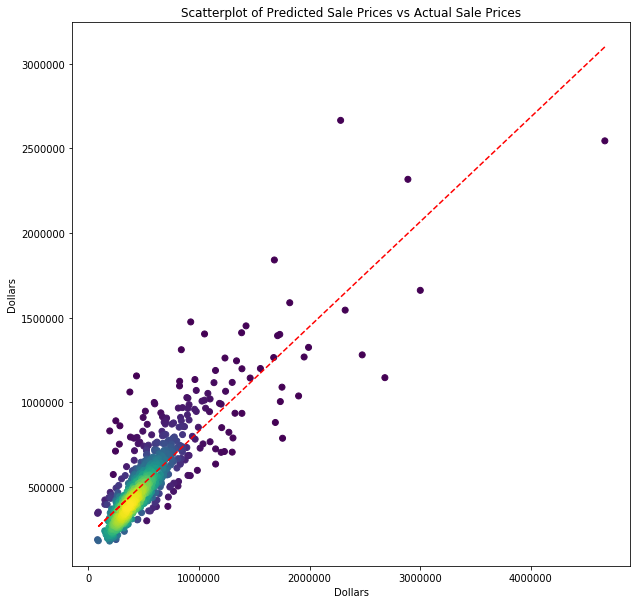

slope: 0.6194603344830483
y intercept: 208757.45239934415


In [5]:
# entire scatterplot
# color by density
x = rf_test_data['price']
y = rf_test_data['predictions']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# scatterplot for price vs lot square footage
plt.figure(figsize = [10,10])
plt.scatter(x, y, c=z)
plt.xlabel('Dollars')
plt.ylabel('Dollars')
plt.title('Scatterplot of Predicted Sale Prices vs Actual Sale Prices')
# add trendline
w = np.polyfit(x, y, 1)
p = np.poly1d(w)
plt.plot(x, p(x), 'r--')
plt.show()
# output equation of the line
print("slope: %s" %w[0])
print("y intercept: %s" %w[1])

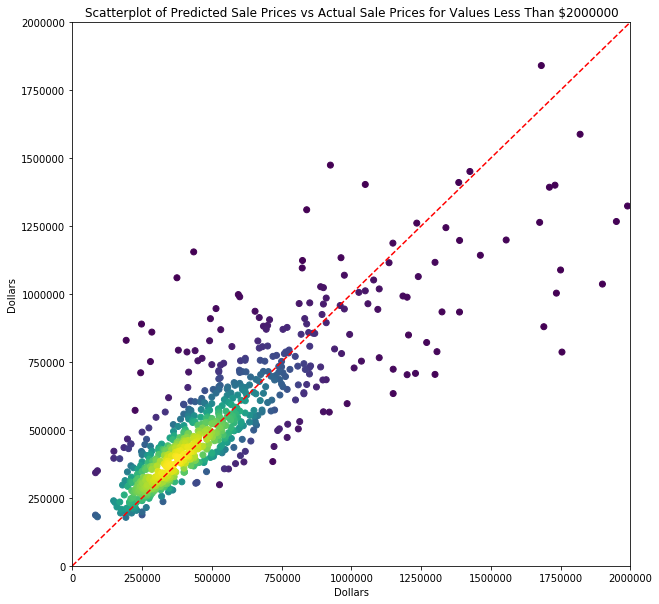

In [6]:
# scatterplot without large values
# color by density
x = rf_test_data['price']
y = rf_test_data['predictions']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# scatterplot for price vs lot square footage
plt.figure(figsize = [10,10])
plt.scatter(x, y, c=z)
plt.xlabel('Dollars')
plt.ylabel('Dollars')
plt.title('Scatterplot of Predicted Sale Prices vs Actual Sale Prices for Values Less Than $2000000')
plt.xlim(0, 2000000)
plt.ylim(0,2000000)
# add line with slope of 1
w = np.linspace(0, 2000000, 5)
plt.plot(w, w, 'r--')
plt.show()

### Scatterplot of 'abs_difference' vs 'price'
- As price increases, the absolute prediction difference increases
    - In general, predictions are less accurate for larger sale prices
        - Large sale prices are outliers
        - Therefore, the model is not well trained for predicting large sale prices

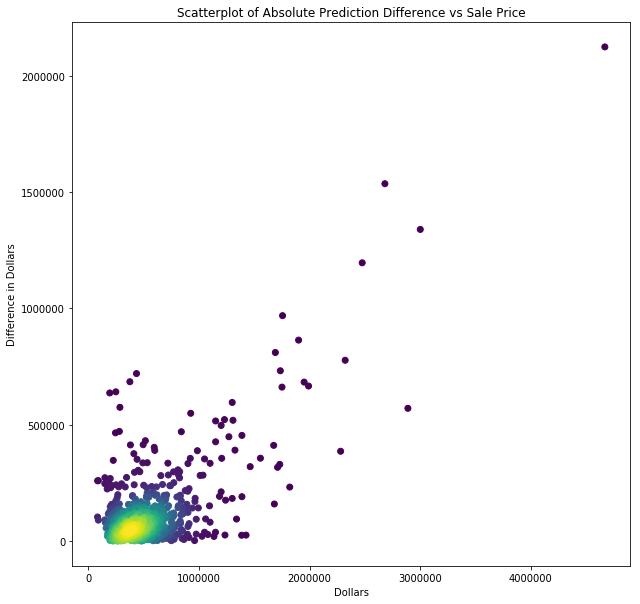

In [7]:
# color by density
x = rf_test_data['price']
y = rf_test_data['abs_difference']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# scatterplot for price vs lot square footage
plt.figure(figsize = [10,10])
plt.scatter(x, y, c=z)
plt.xlabel('Dollars')
plt.ylabel('Difference in Dollars')
plt.title('Scatterplot of Absolute Prediction Difference vs Sale Price')
plt.show()

## Visualizations of Predictor and Predictions
### 'abs_difference' Grouped by 'location'
- Homes sold in East Urban and Seattle have the largest absolute prediction differences
    - *WashingtonHouseSales-DataVisualization* shows that these locations also have the most outliers for price
        - The model is not well trained for predicting outlier values
- Homes sold in North and South Rural have the smallest absolute prediction differences
    - *WashingtonHouseSales-DataVisualization* shows South Rural has very few outliers for price

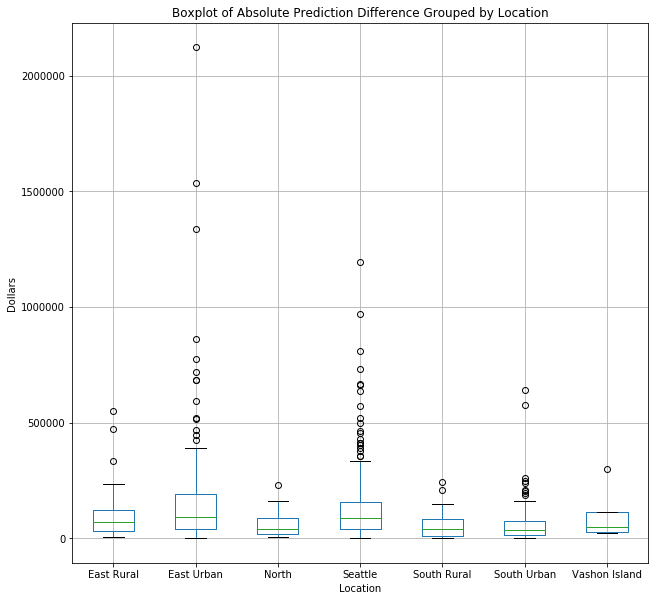

In [8]:
# boxplot for abs_difference vs location
ax = rf_test_data.boxplot(column='abs_difference', by='location', figsize = [10,10])
ax.set_xlabel('Location')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Location')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'waterfront'
- Homes with a waterfront typically have a larger absolute prediction difference
    - This indicates the model has not learned the effect waterfronts have on the sale price of homes

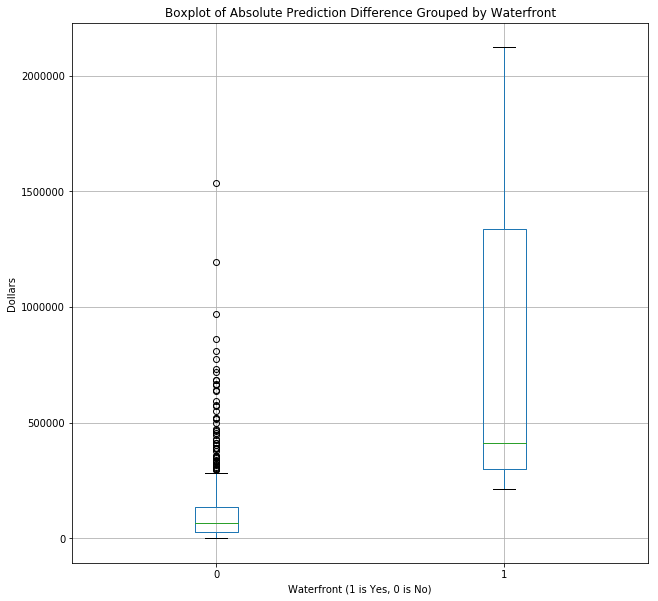

In [9]:
# boxplot for abs_difference vs waterfront
ax = rf_test_data.boxplot(column='abs_difference', by='waterfront', figsize = [10,10])
ax.set_xlabel('Waterfront (1 is Yes, 0 is No)')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Waterfront')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'view'
- Homes with view ratings less than 2 have smaller absolute prediction differences than homes view ratings of 2 or greater

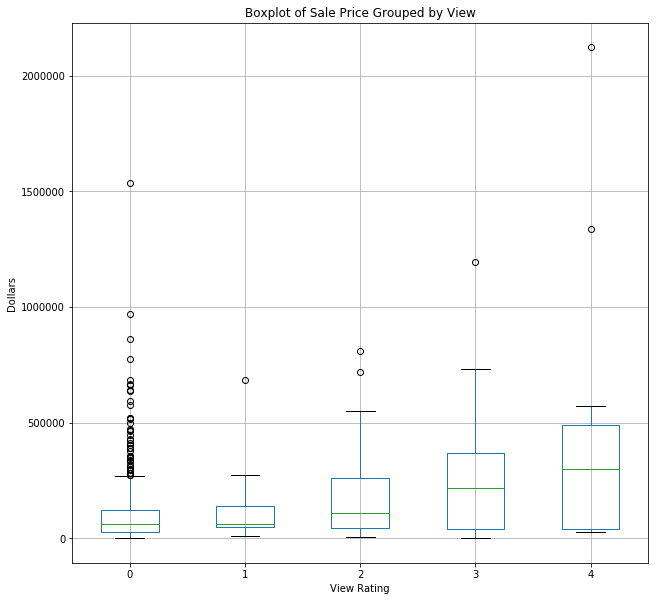

In [10]:
# boxplot for abs_difference vs waterfront
ax = rf_test_data.boxplot(column='abs_difference', by='view', figsize = [10,10])
ax.set_xlabel('View Rating')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Sale Price Grouped by View')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'condition'
- Asides from outliers, all conditions have fairly similar absolute prediction differences

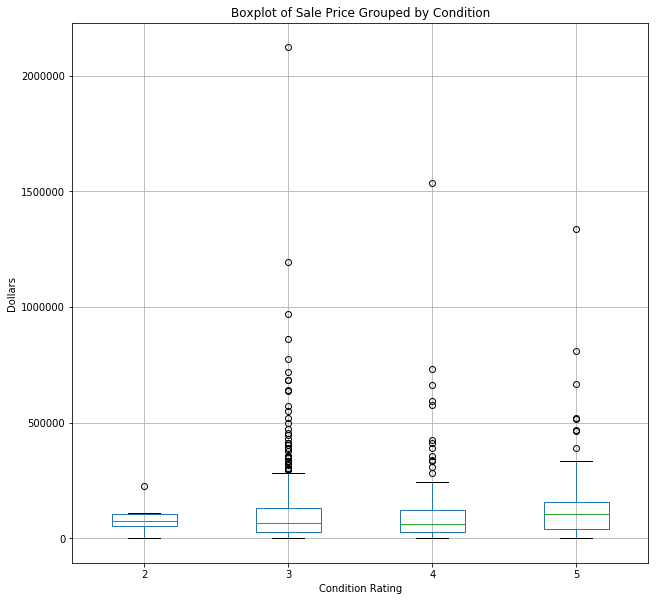

In [11]:
# boxplot for abs_difference vs condition
ax = rf_test_data.boxplot(column='abs_difference', by='condition', figsize = [10,10])
ax.set_xlabel('Condition Rating')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Sale Price Grouped by Condition')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'bedroom'
- Homes with less than 4 bedrooms have smaller absolute prediction differences than homes with 4 or more bedrooms
    - *WashingtonHouseSales-DataVisualization* shows there are wider ranges for prices for homes with 4 or more bedrooms
    - This means the model has a harder time determining sale price when a home has 4 or more bedrooms

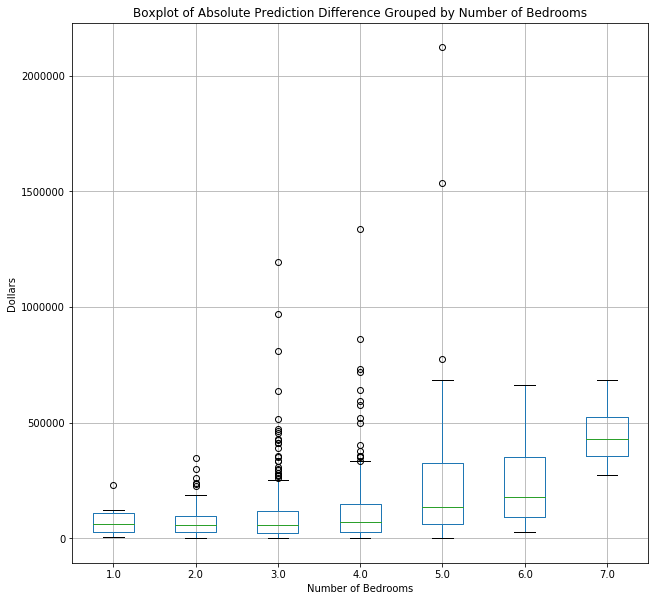

In [12]:
# boxplot for abs_difference vs bedroom
ax = rf_test_data.boxplot(column='abs_difference', by='bedroom', figsize = [10,10])
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Number of Bedrooms')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'bathroom' 
- Homes with less than 3 bathrooms have smaller absolute prediction differences than homes with 3 or more bathrooms
    - *WashingtonHouseSales-DataVisualization* shows that there are many observations of homes with less than 3 bathrooms, and very few observations of homes with 3 or more bathrooms
        - This means there is less data to train the model about how to respond to homes with 3 or more bathrooms
        - Thus, the absolute prediction differences are greater for those categories

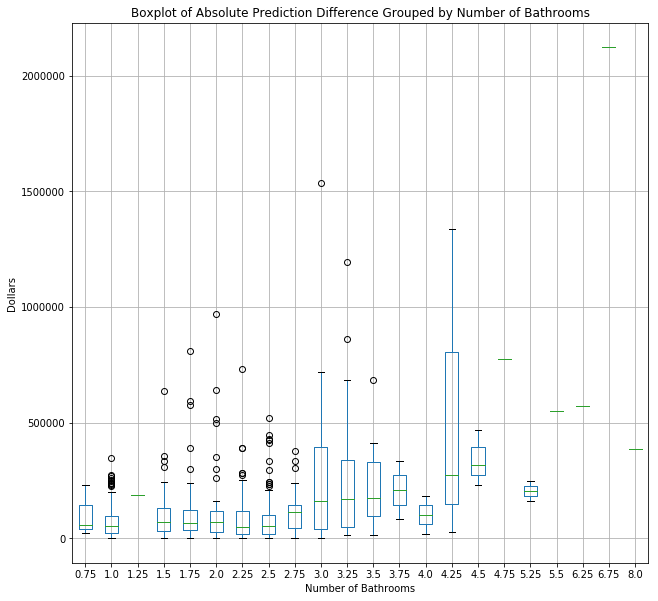

In [13]:
# boxplot for abs_difference vs bathroom
ax = rf_test_data.boxplot(column='abs_difference', by='bathroom', figsize = [10,10])
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Number of Bathrooms')
plt.suptitle('')
plt.show()